Using pytorch to make a 2-layer NN that tells the  
 number from handwritten image

In [20]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Compose, Normalize #so we can convert the images to tensors
from torch.utils.data import DataLoader
from torch import nn as nn, optim as optim
from torch.nn import functional as F
import torch

Downloading the MNIST dataset

In [21]:
train_data = datasets.MNIST(
    root = 'data',
    train = True, # telling it to load the training dataset
    download = True, # to download the dataset 
    transform = ToTensor()
)

test_data = datasets.MNIST(
    root = 'data',
    train = False, # telling it to load the test dataset
    download = True, # to download the dataset 
    transform = ToTensor()
)

In [22]:
# data info

#train_data
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

data size and image size which is 28x28

In [23]:
# train_data.data.shape
test_data.data.shape

torch.Size([10000, 28, 28])

distinct numbers from 0 to 9 which we need the nn to give

In [24]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

Defining a data loader that will load data in batches

Purpose of this is to load data in bathces instead of feeding all at once.  
why?  
it helps in speed and we can control the change in each epoch.  
shuffle = true, shuffles the data before every epoch so model doesnt see data in   
same order. which reduces bias and overfitting.

In [25]:
loader = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)

}

In [26]:
loader

{'train': <torch.utils.data.dataloader.DataLoader at 0x7acc001a91c0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7acc003aa030>}

In [27]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        #input layer
        self.fc1 = nn.Linear(28*28, 128)
        #output layer
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        #flattening the input
        x = x.view(x.size(0), 28*28)
        #input layer relu activation
        x = F.relu(self.fc1(x))
        #output layer
        x = self.fc2(x)
        return x

In [28]:
model = net()
# model
print(model)

net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

training loop

In [37]:
epochs = 10
for epoch in range(epochs):
    model.train()  # set the model to training mode
    loss = 0.0
    for image, label in loader['train']:
        # forward pass
        output = model(image)
        # calculate loss
        loss = criterion(output, label)
        optimizer.zero_grad()
        # backward pass
        loss.backward()
        # update weights
        optimizer.step()
        
        loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss/len(loader['train']):.4f}")

Epoch [1/10], Loss: 0.0002
Epoch [2/10], Loss: 0.0002
Epoch [3/10], Loss: 0.0002
Epoch [4/10], Loss: 0.0001
Epoch [5/10], Loss: 0.0001
Epoch [6/10], Loss: 0.0001
Epoch [7/10], Loss: 0.0001
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0001
Epoch [10/10], Loss: 0.0001


testing

In [38]:
model.eval()  # set the model to evaluation mode
correct, total = 0, 0
with torch.no_grad():
    for image, label in loader['test']:
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()

print(f"accuracy: {100 * correct / total:.2f}%")

accuracy: 97.91%


# Testing on a Random image

In [39]:
from PIL import Image

# Load image
img = Image.open("test2.png").convert("L")  # convert to grayscale

# Define transform: resize → tensor → normalize
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # MNIST size
    transforms.ToTensor(),        # convert to tensor [0,1]
    transforms.Normalize((0.5,), (0.5,))  # normalize like training
])

img_tensor = transform(img).view(1, 28*28)  # flatten to 784


In [40]:
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output.data, 1)

print(f"Predicted digit: {predicted.item()}")


Predicted digit: 4


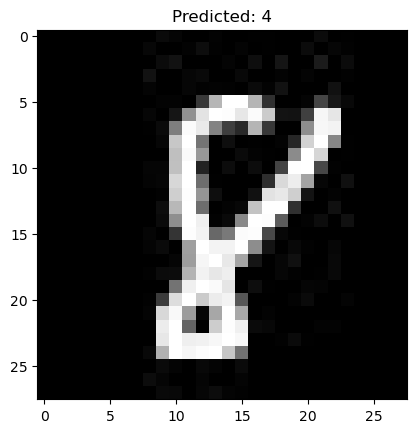

In [41]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {predicted.item()}")
plt.show()
